In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense



2024-01-07 13:30:54.830048: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-07 13:30:54.887864: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-07 13:30:55.688847: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
df = pd.read_csv('DailyDelhiClimateTrain.csv')

In [3]:
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [4]:
df = df.drop(["humidity","wind_speed", "meanpressure"], axis=1)

In [5]:
df

,date,meantemp
0,2013-01-01,10.000000
1,2013-01-02,7.400000
2,2013-01-03,7.166667
3,2013-01-04,8.666667
4,2013-01-05,6.000000
...,...,...
1457,2016-12-28,17.217391
1458,2016-12-29,15.238095
1459,2016-12-30,14.095238
1460,2016-12-31,15.052632


<Axes: xlabel='date', ylabel='Temperature [C]'>

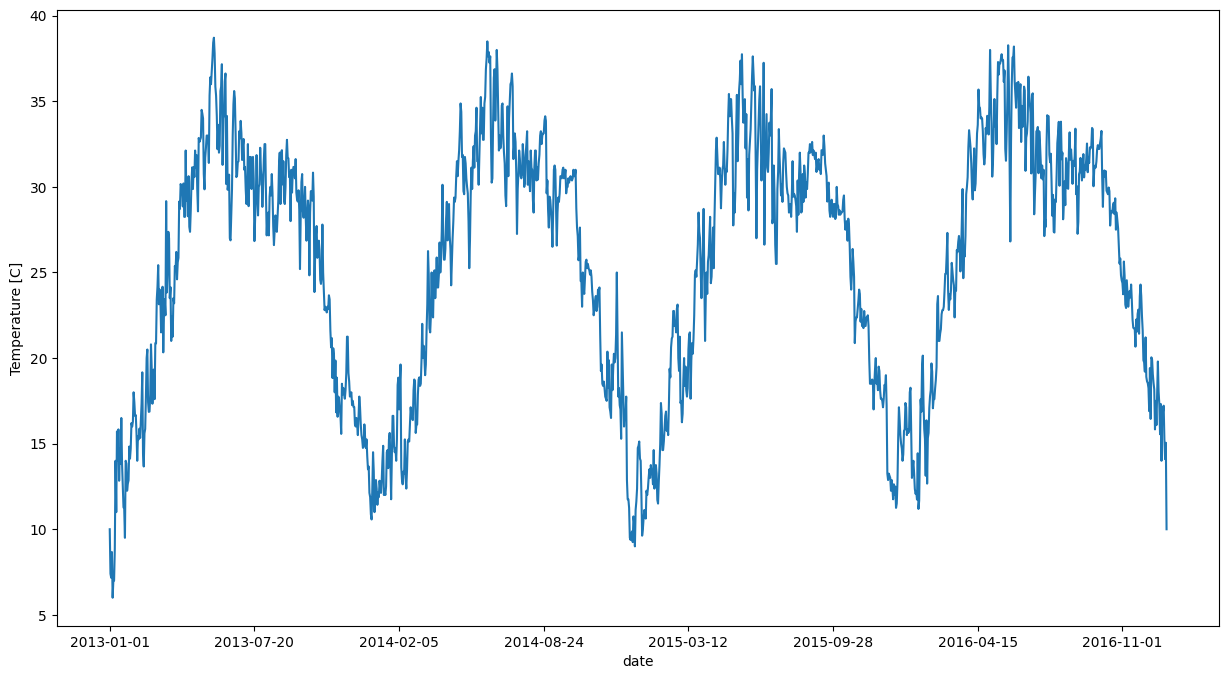

In [6]:
plt.figure(figsize=(15,8))
df_date= df.set_index(['date'], drop=True)
plt.ylabel('Temperature [C]')
df_date['meantemp'].plot()

In [7]:
df.shape

(1462, 2)

In [8]:
train_size = int(df.shape[0]*0.8)

In [9]:
train_size

1169

In [10]:
train = df.loc[:train_size]
test = df.loc[train_size:]

<Figure size 1500x800 with 0 Axes>

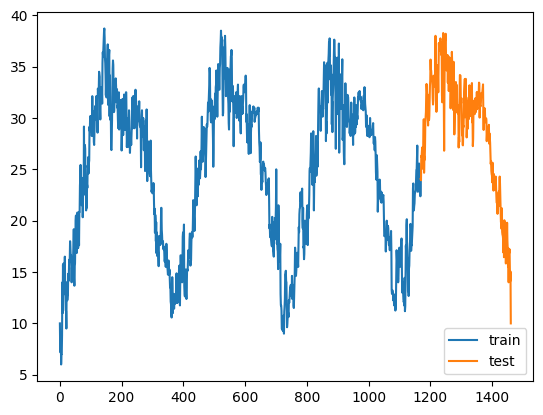

In [11]:
plt.figure(figsize=(15,8))
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test']);

In [25]:
train = df.iloc[:train_size, 1]
test = df.iloc[train_size:, 1]

In [27]:
train = np.array(train).reshape(-1, 1)
test = np.array(test).reshape(-1, 1)

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
train_sc = scaler.fit_transform(train)
test_sc = scaler.transform(test)

In [29]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

In [30]:
X_test = test_sc[:-1]
y_test = test_sc[1:]